In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

Load and plot event/earthquake signal starting around sample 6000

---



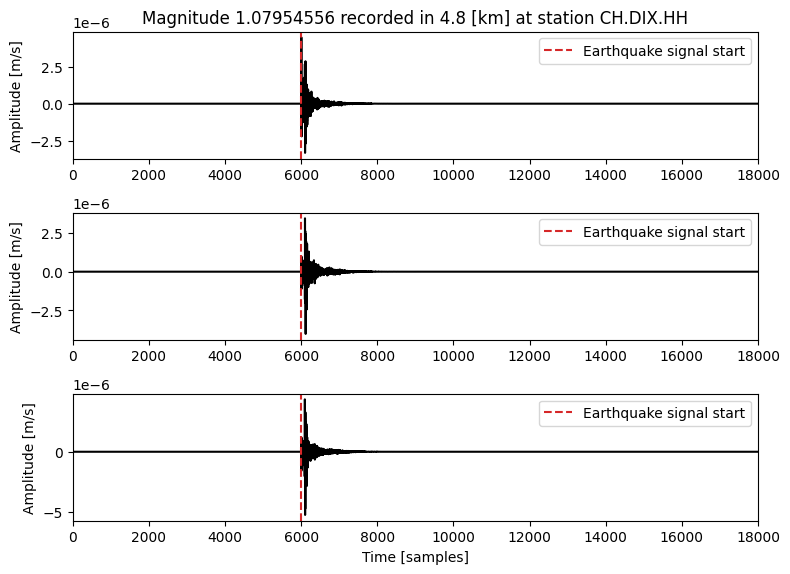

In [63]:
dir_file = "./examples/signal_2009_009_M12_D17_CH_SENIN_HHN.npz"
#dir_file = "./examples/signal_2023_068_M11_D05_CH_DIX_HHZ.npz"

data_npz = np.load(dir_file, allow_pickle=True)
data = {key: data_npz[key] for key in data_npz}

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])  # Three rows, one column

# Create the subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Data for each plot
waveforms = ["earthquake_waveform_Z", "earthquake_waveform_N", "earthquake_waveform_E"]
axes = [ax1, ax2, ax3]

# Loop over axes to plot data and add common settings
for ax, waveform in zip(axes, waveforms):
    ax.plot(data[waveform], color="k")
    ax.set_xlim(0, 18000)
    ax.set_ylabel("Amplitude [m/s]")
    ax.axvline(x=6000, color='tab:red', linestyle='--', label="Earthquake signal start")
    ax.legend()

# Set x-label for the last axis
ax3.set_xlabel("Time [samples]")

ttl_str = "Magnitude " + str(data["magnitude"]) + " recorded in " + str(np.round(data["distance"],1))
ttl_str += " [km] at station " + str(data["code"][0]) + "." +str(data["code"][1]) + "." +str(data["code"][2][:2])
ax1.set_title(ttl_str)
# Display the plot
plt.tight_layout()
plt.show()

Load and plot noise sample


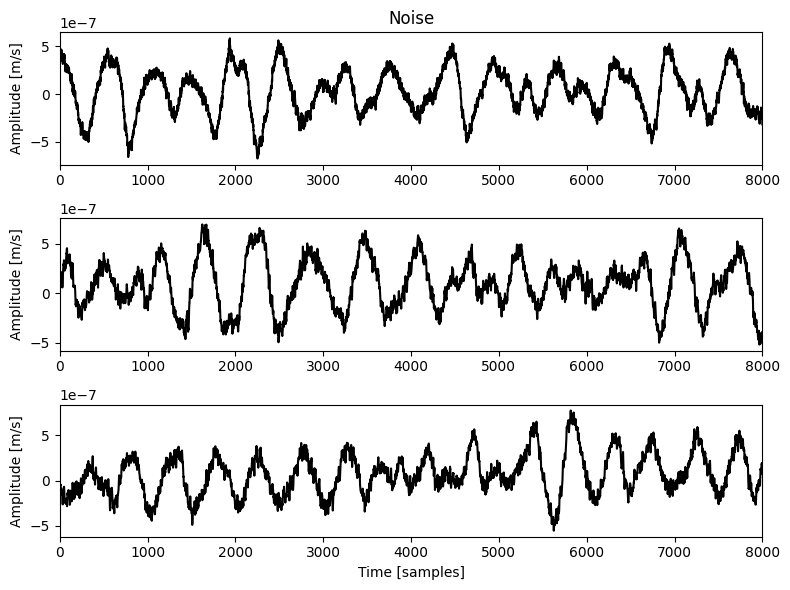

In [64]:
dir_file = "./examples/noise_2023_003_033559_CH_SLE.npz"
#dir_file = "./examples/noise_2023_003_053339_CH_ZUR.npz"

data_npz = np.load(dir_file, allow_pickle=True)
data_noise = {key: data_npz[key] for key in data_npz}

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])  # Three rows, one column

# Create the subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Data for each plot
waveforms = ["noise_waveform_Z", "noise_waveform_N", "noise_waveform_E"]
axes = [ax1, ax2, ax3]

# Loop over axes to plot data and add common settings
for ax, waveform in zip(axes, waveforms):
    ax.plot(data_noise[waveform], color="k")
    ax.set_xlim(0, 8000)
    ax.set_ylabel("Amplitude [m/s]")

# Set x-label for the last axis
ax3.set_xlabel("Time [samples]")

ax1.set_title("Noise")
# Display the plot
plt.tight_layout()
plt.show()

Combine event and noise signal - vertical component

generate different combinations of event and noise signals by:
- shifting the start of the event signals in time
- changing the relative amplitude of event and noise signals - known as signal-to-nosie ratio (SNR)

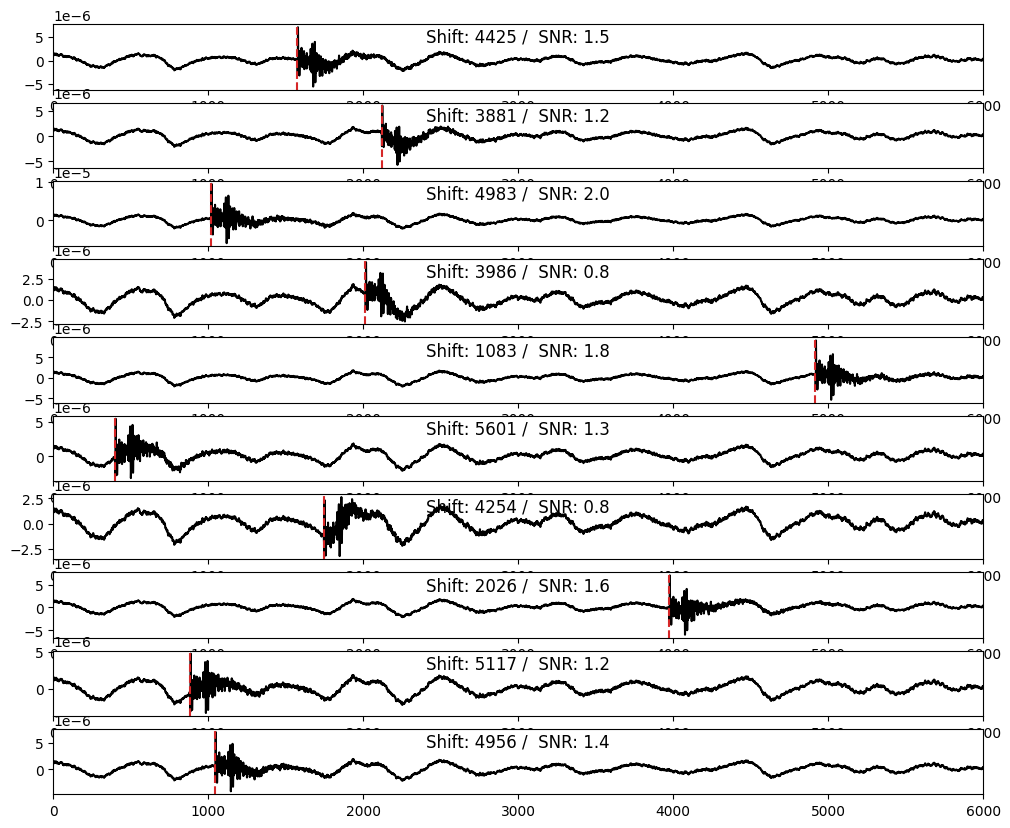

In [69]:
num_examples = 10
len_sample = 6000  # 6000 samples = 60 seconds
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(num_examples, 1)  # Three rows, one column

# generate noisy event waveforms 8event+noise) with simple variations
for i in range(num_examples):
    event = np.copy(data["earthquake_waveform_Z"])
    noise = np.copy(data_noise["noise_waveform_Z"])

    # randomly change relative amplitude of event and noise signal
    # relative amplitude = signal-to-noise ratio SNR
    # compute SNR
    signal_std = np.std(event[6000:6500])  # compute signals std over main event signal
    noise_std = np.std(noise[6000:6500])  #  compute nosie std 
    snr_original = signal_std / noise_std

    # change the SNR
    noise_snr_mod = noise * snr_original  # rescale noise so that SNR=1
    snr_random = np.random.uniform(0.5,10)  # random SNR     
    event_snr_mod = event * snr_random  # rescale event to desired SNR

    # randomly shift event start
    event_shift = np.random.randint(1000,6000)    
    
    noisy_event = event_snr_mod[event_shift:len_sample+event_shift] + noise_snr_mod[:len_sample]  # randomnly cut event waveform to shorter tiem window, cut noise waveform
    
    ax = fig.add_subplot(gs[i])
    ax.plot(noisy_event,color="k")
    ax.axvline(x=6000-event_shift, color='tab:red', linestyle='--', label="Earthquake signal start")
    ax.set_xlim(0,len_sample)
    ax.set_title("Shift: " + str(event_shift) + " /  SNR: " + str(np.round(snr_random,1)),y=0.6)

